In [213]:
import pandas as pd
import numpy as np
from io import BytesIO
import requests
import json

# Gathering Data for this Project

In [214]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

response = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
image_predictions = pd.read_csv(BytesIO(response.content) , sep="\t" )


In [7]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            pass
#             fails_dict[tweet_id] = e
#             pass
end = timer()
print(end - start)
print(fails_dict)

1: [892420643555336193 nan nan '2017-08-01 16:23:56 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"
 nan nan nan
 'https://twitter.com/dog_rates/status/892420643555336193/photo/1' 13 10
 'Phineas' 'None' 'None' 'None' 'None']
Fail
2: [892177421306343426 nan nan '2017-08-01 00:17:27 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"
 nan nan nan
 'https://twitter.com/dog_rates/status/892177421306343426/photo/1' 13 10
 'Tilly' 'None' 'None' 'None' 'None']
Fail
3: [891815181378084864 nan nan '2017-07-31 00:18:03 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 'This is Archie. He is a 

Fail
20: [888202515573088257 nan nan '2017-07-21 01:02:36 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 'RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX'
 8.874739571039519e+17 4196983835.0 '2017-07-19 00:47:34 +0000'
 'https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1'
 13 10 'Canela' 'None' 'None' 'None' 'None']
Fail
21: [888078434458587136 nan nan '2017-07-20 16:49:33 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 "This is Gerald. He was just told he didn't get the job he interviewed for. A h*ckin injustice. 12/10 didn't want the job anyway https://t.co/DK7iDPfuRX"
 nan nan nan
 'https://twitter.co

Fail
39: [884925521741709313 nan nan '2017-07-12 00:01:00 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 "This is Earl. He found a hat. Nervous about what you think of it. 12/10 it's delightful, Earl https://t.co/MYJvdlNRVa"
 nan nan nan
 'https://twitter.com/dog_rates/status/884925521741709313/photo/1' 12 10
 'Earl' 'None' 'None' 'None' 'None']
Fail
40: [884876753390489601 nan nan '2017-07-11 20:47:12 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 "This is Lola. It's her first time outside. Must test the earth and taste the atmosphere. 13/10 you're doing great Lola https://t.co/74TKAUsLkO"
 nan nan nan
 'https://twitter.com/dog_rates/status/884876753390489601/photo/1,https://twitter.com/dog_rates/status/884876753390489601/photo/1,https://twitter.com/dog_rates/status/884876753390489601/photo/1,https://twitter.com/dog_rates/status/884876753390489601/photo/1'
 13 10 'Lola' 'None' 'None' 'None' '

Fail
58: [881268444196462592 nan nan '2017-07-01 21:49:04 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 "Meet Elliot. He's a Canadian Forrest Pup. Unusual number of antlers for a dog. Sneaky tongue slip to celebrate #Canada150. 12/10 would pet https://t.co/cgwJwowTMC"
 nan nan nan
 'https://twitter.com/dog_rates/status/881268444196462592/photo/1' 12 10
 'Elliot' 'None' 'None' 'None' 'None']
Fail
59: [880935762899988482 nan nan '2017-06-30 23:47:07 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 "This is Louis. He's crossing. It's a big deal. 13/10 h*ckin breathtaking https://t.co/D0wb1GlKAt"
 nan nan nan
 'https://twitter.com/dog_rates/status/880935762899988482/photo/1' 13 10
 'Louis' 'None' 'None' 'None' 'None']
Fail
60: [880872448815771648 nan nan '2017-06-30 19:35:32 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 "Ugh not again. We only rate do

Fail
77: [878057613040115712 nan nan '2017-06-23 01:10:23 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 'This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://t.co/cwtWnHMVpe'
 nan nan nan
 'https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1'
 14 10 'Emmy' 'None' 'None' 'None' 'None']
Fail
78: [877736472329191424 nan nan '2017-06-22 03:54:17 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 "This is Aja. She was just told she's a good dog. Suspicions confirmed. 13/10 would tell again https://t.co/lsPyyAiF1r"
 nan nan nan
 'https://twitter.com/dog_rates/status/877736472329191424/photo/1,https://twitter.com/dog_rates/status/877736472329191424/photo/1'
 13 10 'Aja' 'None' 'None' 'None' 'None']
Fail
79: [877611172832227328 nan nan '2017-06-21 19:36:23 +00

Fail
95: [874012996292530176 nan nan '2017-06-11 21:18:31 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 "This is Sebastian. He can't see all the colors of the rainbow, but he can see that this flag makes his human happy. 13/10 #PrideMonth puppo https://t.co/XBE0evJZ6V"
 nan nan nan
 'https://twitter.com/dog_rates/status/874012996292530176/photo/1,https://twitter.com/dog_rates/status/874012996292530176/photo/1'
 13 10 'Sebastian' 'None' 'None' 'None' 'puppo']
Fail
96: [873697596434513921 nan nan '2017-06-11 00:25:14 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 "RT @dog_rates: This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF"
 8.688803978194944e+17 4196983835.0 '2017-05-28 17:23:24 +0000'
 'https://twitter.com/dog_rates/status/868880397819494401/photo/1,https://twitter.com/dog_rates/status/868880397819494401/photo/1'
 1

Fail
112: [871032628920680449 nan nan '2017-06-03 15:55:36 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 "This is Boomer. He's doing an advanced water takeoff. The opposite of Sully. Ears for control, mlem for style. 13/10 simply breathtaking https://t.co/noNpY2Laoo"
 nan nan nan
 'https://twitter.com/dog_rates/status/871032628920680449/photo/1' 13 10
 'Boomer' 'None' 'None' 'None' 'None']
Fail
113: [870804317367881728 nan nan '2017-06-03 00:48:22 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 "Real funny guys. Sending in a pic without a dog in it. Hilarious. We'll rate the rug tho because it's giving off a very good vibe. 11/10 https://t.co/GCD1JccCyi"
 nan nan nan
 'https://twitter.com/dog_rates/status/870804317367881728/photo/1' 11 10
 'None' 'None' 'None' 'None' 'None']
Fail
114: [870726314365509632 8.707262027424932e+17 16487760.0
 '2017-06-02 19:38:25 +0000'
 '<a href="http://twitter.co

Fail
130: [867421006826221569 nan nan '2017-05-24 16:44:18 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 'This is Shikha. She just watched you drop a skittle on the ground and still eat it. Could not be less impressed. 12/10 superior puppo https://t.co/XZlZKd73go'
 nan nan nan
 'https://twitter.com/dog_rates/status/867421006826221569/photo/1' 12 10
 'Shikha' 'None' 'None' 'None' 'puppo']
Fail
131: [867072653475098625 nan nan '2017-05-23 17:40:04 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 'RT @rachaeleasler: these @dog_rates hats are 13/10 bean approved https://t.co/nRCdq4g9gG'
 8.650134204453683e+17 7.874617784352891e+17 '2017-05-18 01:17:25 +0000'
 'https://twitter.com/rachaeleasler/status/865013420445368320/photo/1,https://twitter.com/rachaeleasler/status/865013420445368320/photo/1,https://twitter.com/rachaeleasler/status/865013420445368320/photo/1,https://twitter.com/rachaeleasler/stat

Fail
147: [863471782782697472 nan nan '2017-05-13 19:11:30 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 "RT @dog_rates: Say hello to Quinn. She's quite the goofball. Not even a year old. Confirmed 13/10 but she really needs your help \n\nhttps://…"
 8.630624715311677e+17 4196983835.0 '2017-05-12 16:05:02 +0000'
 'https://www.gofundme.com/helpquinny,https://twitter.com/dog_rates/status/863062471531167744/photo/1,https://twitter.com/dog_rates/status/863062471531167744/photo/1,https://twitter.com/dog_rates/status/863062471531167744/photo/1,https://twitter.com/dog_rates/status/863062471531167744/photo/1'
 13 10 'Quinn' 'None' 'None' 'None' 'None']
Fail
148: [863432100342583297 nan nan '2017-05-13 16:33:49 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 "This is Belle. She's never been more pupset. Encountered the worst imaginable type of zone. 12/10 would do anything to cheer pup https://t.co/fGQ

Fail
163: [860524505164394496 nan nan '2017-05-05 16:00:04 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 "This is Carl. He likes to dance. Doesn't care what you think about it. 13/10 h*ckin confident pup https://t.co/C2zHcNIu4I"
 nan nan nan
 'https://twitter.com/dog_rates/status/860524505164394496/photo/1' 13 10
 'Carl' 'None' 'None' 'None' 'None']
Fail
164: [860276583193509888 nan nan '2017-05-04 23:34:55 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 'This is Jordy. He likes to go on adventures and watch the small scaly underwater dogs with fins pass him by. 12/10 peaceful as h*ck https://t.co/xJo6S2sfsN'
 nan nan nan
 'https://twitter.com/dog_rates/status/860276583193509888/photo/1' 12 10
 'Jordy' 'None' 'None' 'None' 'None']
Fail
165: [860184849394610176 nan nan '2017-05-04 17:30:24 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 'Here we hav

Fail
181: [857062103051644929 nan nan '2017-04-26 02:41:43 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 'RT @AaronChewning: First time wearing my @dog_rates hat on a flight and I get DOUBLE OPEN ROWS. Really makes you think. 13/10 https://t.co/…'
 8.57061112319234e+17 58709723.0 '2017-04-26 02:37:47 +0000'
 'https://twitter.com/AaronChewning/status/857061112319234050/photo/1' 13
 10 'None' 'None' 'None' 'None' 'None']
Fail
182: [857029823797047296 nan nan '2017-04-26 00:33:27 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 'This is Zeke. He performs group cheeky wink tutorials. Pawfect execution here. 12/10 would wink back https://t.co/uMH5CLjXJu'
 nan nan nan
 'https://twitter.com/dog_rates/status/857029823797047296/photo/1,https://twitter.com/dog_rates/status/857029823797047296/photo/1'
 12 10 'Zeke' 'None' 'None' 'None' 'None']
Fail
183: [856602993587888130 nan nan '2017-04-24 20:17:23 +00

Fail
200: [854120357044912130 nan nan '2017-04-17 23:52:16 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 'Sometimes you guys remind me just how impactful a pupper can be. Cooper will be remembered as a good boy by so many. 14/10 rest easy friend https://t.co/oBL7LEJEzR'
 nan nan nan
 'https://twitter.com/dog_rates/status/854120357044912130/photo/1,https://twitter.com/dog_rates/status/854120357044912130/photo/1,https://twitter.com/dog_rates/status/854120357044912130/photo/1,https://twitter.com/dog_rates/status/854120357044912130/photo/1'
 14 10 'None' 'None' 'None' 'pupper' 'None']
Fail
201: [854010172552949760 nan nan '2017-04-17 16:34:26 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 "At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"
 nan nan nan
 'https://twitter.com/dog_rates

Fail
216: [851224888060895234 nan nan '2017-04-10 00:06:42 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 'Meet Snoop. His number one passion is sticking his head out of car windows, so he purchased some doggles. Stylish af. 13/10 happy travels https://t.co/iHYfZdz444'
 nan nan nan
 'https://twitter.com/dog_rates/status/851224888060895234/photo/1,https://twitter.com/dog_rates/status/851224888060895234/photo/1,https://twitter.com/dog_rates/status/851224888060895234/photo/1,https://twitter.com/dog_rates/status/851224888060895234/photo/1'
 13 10 'Snoop' 'None' 'None' 'None' 'None']
Fail
217: [850753642995093505 nan nan '2017-04-08 16:54:09 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 'This is Kyle. He made a joke about your shoes, then stuck his tongue out at you. Uncalled for. Step the h*ck up Kyle. 11/10 would forgive https://t.co/hLQ2Ilg2uN'
 nan nan nan
 'https://twitter.com/dog_rates/statu

Fail
233: [847962785489326080 nan nan '2017-04-01 00:04:17 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 "This is Georgie. He's very shy. Only puppears when called. Aggressively average at fetch. Unique front paws. Looks slippery. 10/10 would pet https://t.co/rcDs5LkiSj"
 nan nan nan
 'https://twitter.com/dog_rates/status/847962785489326080/photo/1' 10 10
 'Georgie' 'None' 'None' 'None' 'None']
Fail
234: [847842811428974592 nan nan '2017-03-31 16:07:33 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 'This is Rontu. He is described as a pal, cuddle bug, protector and constant shadow. 12/10, but he needs your help\n\nhttps://t.co/zK4cpKPFfU https://t.co/7Xvoalr798'
 nan nan nan
 'https://www.gofundme.com/help-save-rontu,https://twitter.com/dog_rates/status/847842811428974592/photo/1'
 12 10 'Rontu' 'None' 'None' 'None' 'None']
Fail
235: [847617282490613760 8.476061755961385e+17 4196983835.0
 '20

Fail
251: [845098359547420673 nan nan '2017-03-24 02:22:04 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 'RT @dog_rates: This is Bungalo. She uses that face to get what she wants. It works unbelievably well. 12/10 would never say no to https://t…'
 7.733088242540298e+17 4196983835.0 '2016-09-06 23:56:05 +0000'
 'https://twitter.com/dog_rates/status/773308824254029826/photo/1' 12 10
 'Bungalo' 'None' 'None' 'None' 'None']
Fail
252: [844979544864018432 7.590995235327795e+17 4196983835.0
 '2017-03-23 18:29:57 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 "PUPDATE: I'm proud to announce that Toby is 236 days sober. Pupgraded to a 13/10. We're all very proud of you, Toby https://t.co/a5OaJeRl9B"
 nan nan nan
 'https://twitter.com/dog_rates/status/844979544864018432/photo/1,https://twitter.com/dog_rates/status/844979544864018432/photo/1,https://twitter.com/dog_rates/status/844979544864018432/photo

Fail
269: [841439858740625411 nan nan '2017-03-14 00:04:30 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 'Here we have some incredible doggos for #K9VeteransDay. All brave as h*ck. Salute your dog in solidarity. 14/10 for all https://t.co/SVNMdFqKDL'
 nan nan nan
 'https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1,https://twitter.com/dog_rates/status/841439858740625411/photo/1'
 14 10 'None' 'None' 'None' 'None' 'None']
Fail
270: [841320156043304961 nan nan '2017-03-13 16:08:50 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 "We don't rate penguins, but if we did, this one would get 12/10 https://t.co/cEORXhwZ5K"
 nan nan nan 'https://twitter.com/abc/status/841311395547250688' 12 10
 'None' 'None' 'None' 'None' 'None']
Fail
271: [841314665196081154 nan n

Fail
287: [838831947270979586 nan nan '2017-03-06 19:21:35 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 "RT @dog_rates: This is Riley. His owner put a donut pillow around him and he loves it so much he won't let anyone take it off. 13/10 https:…"
 7.838399664052306e+17 4196983835.0 '2016-10-06 01:23:05 +0000'
 'https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1'
 13 10 'Riley' 'None' 'None' 'None' 'None']
Fail
288: [838561493054533637 nan nan '2017-03-06 01:26:54 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 "This is Walter. His owner has been watching all the Iditarod coverage and is convinced Walter can be a sled dog. 13/10 Walter isn't so sure https://t.co/0av1PEehFI"
 nan nan nan
 'https://twitter.com/dog_rates/status/838561493054533637/photo/1' 13

Fail
305: [836380477523124226 nan nan '2017-02-28 01:00:19 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 'This is Ava. She just blasted off. Streamline af. Aerodynamic as h*ck. One small step for pupper, one giant leap for pupkind. 12/10 https://t.co/W4KffrdX3Q'
 nan nan nan
 'https://twitter.com/dog_rates/status/836380477523124226/photo/1' 12 10
 'Ava' 'None' 'None' 'pupper' 'None']
Fail
306: [836260088725786625 nan nan '2017-02-27 17:01:56 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 'This is Lucy. She spent all morning overseeing the shoveling of the driveway. H*ckin hard work. 13/10 very good girl Lucy https://t.co/gA2GECjiQD'
 nan nan nan
 'https://twitter.com/dog_rates/status/836260088725786625/photo/1' 13 10
 'Lucy' 'None' 'None' 'None' 'None']
Fail
307: [836001077879255040 nan nan '2017-02-26 23:52:43 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for i

Fail
323: [834167344700198914 nan nan '2017-02-21 22:26:07 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 "This is Sunshine. She doesn't believe in personal space. Eyes pretty far apart for a dog. Has horns (whoa). 11/10 would pet with wonder https://t.co/o3bhLguymB"
 nan nan nan
 'https://twitter.com/dog_rates/status/834167344700198914/photo/1' 11 10
 'Sunshine' 'None' 'None' 'None' 'None']
Fail
324: [834089966724603904 nan nan '2017-02-21 17:18:39 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 'DOGGO ON THE LOOSE I REPEAT DOGGO ON THE LOOSE 10/10 https://t.co/ffIH2WxwF0'
 nan nan nan 'https://twitter.com/stevekopack/status/834086676934836224'
 10 10 'None' 'doggo' 'None' 'None' 'None']
Fail
325: [834086379323871233 nan nan '2017-02-21 17:04:24 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 "This is Lipton. He's a West Romanian Snuggle Pup. Only 

Fail
341: [832215909146226688 nan nan '2017-02-16 13:11:49 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 "RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…"
 7.867090828498289e+17 4196983835.0 '2016-10-13 23:23:56 +0000'
 'https://twitter.com/dog_rates/status/786709082849828864/photo/1' 75 10
 'Logan' 'None' 'None' 'None' 'None']
Fail
342: [832215726631055365 nan nan '2017-02-16 13:11:05 +0000'
 '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
 "RT @dog_rates: This is Moreton. He's the Good Boy Who Lived. 13/10 magical as h*ck https://t.co/rLHGx3VAF3"
 7.932864763017994e+17 4196983835.0 '2016-11-01 03:00:09 +0000'
 'https://twitter.com/dog_rates/status/793286476301799424/photo/1,https://twitter.com/dog_rates/status/793286476301799424/photo/1,https://twitter.com/dog_rates/status/793286476301799424/photo/1,https://t

KeyboardInterrupt: 

In [215]:

tweet_json = pd.read_json("tweet-json.txt" , lines=True)

# Assessing 

In [216]:
twitter_archive.tail()

twitter_archive.query('tweet_id==666049248165822465')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [217]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [218]:
twitter_archive[["doggo" , "floofer" , "pupper" , "puppo"] ].describe()


,doggo,floofer,pupper,puppo
count,2356,2356,2356,2356
unique,2,2,2,2
top,None,None,None,None
freq,2259,2346,2099,2326


In [219]:
twitter_archive.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})


,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


In [220]:
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Rinna        1
Keet         1
Bruno        1
Puff         1
Kota         1
Name: name, Length: 957, dtype: int64

In [221]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [222]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [223]:
tweet_json.sample(10)



,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1745,2015-12-22 01:28:25+00:00,679111216690831360,679111216690831360,This is officially the greatest yawn of all ti...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 679111114081370114, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,6514,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
920,2016-07-21 23:53:04+00:00,756275833623502848,756275833623502848,When ur older siblings get to play in the deep...,False,"[0, 113]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 756275824932876290, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,7114,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1714,2015-12-25 02:01:30+00:00,680206703334408192,680206703334408192,I hope everyone enjoys this picture as much as...,False,"[0, 96]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 680206691359715328, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3115,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
406,2017-01-24 01:08:40+00:00,823699002998870016,823699002998870016,This is Winston. The goggles make him a superh...,False,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 823698991951056896, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,13826,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
421,2017-01-18 20:16:54+00:00,821813639212650496,821813639212650496,RT @dog_rates: Meet Hercules. He can have what...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 780601293052190720, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Tue Sep 27 02:53:48 +0000 2016...,NaN,NaN,NaN
2212,2015-11-22 21:41:02+00:00,668544745690562560,668544745690562560,It is an honor to rate this pup. He is a Snork...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 668544740393136128, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,561,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1910,2015-12-09 01:07:00+00:00,674394782723014656,674394782723014656,This is Gary. He's a hide and seek champion. S...,False,"[0, 110]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 674394776565891077, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1607,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1234,2016-03-23 00:37:48+00:00,712438159032893441,712438159032893440,This is Kane. He's a semi-submerged Haitian Hu...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 712438152884043776, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,5799,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1608,2016-01-08 18:43:29+00:00,685532292383666176,685532292383666176,"For the last time, WE. DO. NOT. RATE. BULBASAU...",False,"[0, 132]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 685532287132430340, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3336,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1574,2016-01-14 02:25:31+00:00,687460506001633280,687460506001633280,This is Kramer. He's a Picasso Tortellini. Tie...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 687460500490338305, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2243,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [224]:
tweet_json.user[0]

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs™ (author)',
 'screen_name': 'dog_rates',
 'location': 'DM YOUR DOGS, WE WILL RATE',
 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com',
 'url': 'https://t.co/N7sNNHAEXS',
 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS',
     'expanded_url': 'http://weratedogs.com',
     'display_url': 'weratedogs.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 3200889,
 'friends_count': 104,
 'listed_count': 2784,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 114031,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 5288,
 'lang': 'en',
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'prof

In [225]:
tweet_json.query('is_quote_status == True')
tweet_json.retweet_count.head()

0    8853
1    6514
2    4328
3    8964
4    9774
Name: retweet_count, dtype: int64

In [226]:
tweet_json.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

# issues

## Quality

### twitter_archive table
- `source` column : unnessary  tag ```<a>``` we just need the text between a tag ex '```<a href="www.test.com">text  we want </a>'``` 

- `timestamp` column should be in dateTime type instead of object (string)  
- `name` column has 745 missing value for dog name and 55 dog called a which is weird to have a dog called a
-Merge multiple dog stages and convert 'None' to empty string ""
- Incorrect values in rating numerators
- Dog names not corrected

### twitter_archive_clean table (as we know the wrangle process can be iterative)
- `dog_types` has 9030 missing values
- `dog_types` instead of "None" which is string we want to convert it to NaN (null) for accuracy
- `tweet_id` there is just 2356 unique tweet id from 9424 which mean whe have 7068 duplicated value


- issue with completeness with these columns 
```
    in_reply_to_status_id       87 non-null     float64            
    in_reply_to_user_id         87 non-null     float64                       
    retweeted_status_id         219 non-null    float64            
    retweeted_status_user_id    219 non-null    float64            
    retweeted_status_timestamp  219 non-null    object 
 ```
 
- drop rating_denominator as it has the same value a crross rows (10)

- This columns should have type integer instead of float since there is no fraction 
```
retweet_count               2747 non-null   float64            
favorite_count              2747 non-null   float64 
 ```
- and replace NaN by the mean of the column to can convert this column type into integer
 
- `tweet_id` it has integer type but we will not do any math caculation so it should be as string  


## image_predictions table
- desktop_computer , microphone , coffee_mug , pencil	is not a dog types name 
 

## tidy

- `doggo floofer pupper puppo`Fine For Humans – Not So Good For Analysis we need to reshape this
- merge the twitter_archive with tweet_json to get more insights 


# Clean

In [227]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean =  tweet_json.copy()

# define
 convert 'None' or np.NaN to empty string ""  for Merge multiple dog stages


# code

In [228]:
twitter_archive_clean.doggo.replace("None" , ""  , inplace = True)
twitter_archive_clean.floofer.replace("None" , ""  , inplace = True)
twitter_archive_clean.pupper.replace("None" , ""  , inplace = True)
twitter_archive_clean.puppo.replace("None" , ""  , inplace = True)

# test

In [229]:
twitter_archive_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})


,doggo,floofer,pupper,puppo,count
0,,,,,1976
1,,,,puppo,29
2,,,pupper,,245
3,,floofer,,,9
4,doggo,,,,83
5,doggo,,,puppo,1
6,doggo,,pupper,,12
7,doggo,floofer,,,1


# define
Merge multiple dog stages

# Code

In [230]:
twitter_archive_clean['stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

# test

In [232]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,


## Define

- extract the content between tags in source column for twitter_archive table

## Code

In [233]:
 twitter_archive_clean.source = twitter_archive_clean.source.str.extract(">(\w+\D+)</a>")

## test

In [234]:
twitter_archive_clean.source.sample(5)

2209    Twitter for iPhone
1655    Twitter for iPhone
535     Twitter for iPhone
1804    Twitter for iPhone
500     Twitter for iPhone
Name: source, dtype: object

## Define
Convert `timestamp` column type from object to date time type using astype method

## Code

In [235]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

# Test

In [236]:
twitter_archive_clean.timestamp.sample(10)

1036   2016-06-20 19:11:53+00:00
2010   2015-12-03 02:56:30+00:00
1694   2015-12-28 01:12:59+00:00
626    2016-11-06 01:33:58+00:00
1672   2015-12-31 02:33:29+00:00
1374   2016-02-23 02:12:47+00:00
2345   2015-11-16 01:22:45+00:00
448    2017-01-11 02:21:57+00:00
370    2017-02-06 01:07:28+00:00
749    2016-09-23 01:04:56+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

## Define
reshape twitter_archive_clean table using melt function to compine `doggo	floofer	pupper	puppo` into one column called  dog_types

## code

In [237]:
id_vars = list(twitter_archive_clean)[:-4]

In [242]:
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=id_vars   , value_name="dogs_types")
twitter_archive_clean.drop(columns="variable" , inplace =True)

## Test

In [243]:
twitter_archive_clean.sample(5)
twitter_archive_clean.dogs_types.value_counts()

                  8747
pupper             502
doggo               83
puppo               59
floofer             19
doggo, pupper       12
doggo, floofer       1
doggo, puppo         1
Name: dogs_types, dtype: int64

##  Define 
- replace missing values for dog_types col by predection p1 so we need to merge p1 to make your life easy
- Convert "None" value in dog type into NaN (null)

## code

In [244]:
twitter_archive_clean = pd.merge(twitter_archive_clean , image_predictions_clean.iloc[:, np.r_[0,3]] , how="left" , on = ["tweet_id"])

In [245]:
twitter_archive_clean.dogs_types.replace("" , np.nan , inplace=True)
twitter_archive_clean["dog_types"]=twitter_archive_clean[["dogs_types", "p1"]].fillna(method="backfill" , axis=1 ).iloc[:,:1]
twitter_archive_clean.drop(columns=["dogs_types" , "p1" ] , inplace=True)

## Test

In [246]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,dog_types
5810,736010884653420544,NaN,NaN,2016-05-27 01:47:23+00:00,Twitter for iPhone,Right after you graduate vs when you remember ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736010884...,10,10,None,,golden_retriever
1668,682638830361513985,NaN,NaN,2015-12-31 19:05:54+00:00,Twitter for iPhone,I have no words. Just a magnificent pup. 12/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682638830...,12,10,None,,English_springer
2753,825120256414846976,NaN,NaN,2017-01-27 23:16:13+00:00,Twitter for iPhone,RT @dog_rates: Say hello to Pablo. He's one go...,8.250266e+17,4.196984e+09,2017-01-27 17:04:02 +0000,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,,NaN
3219,762471784394268675,NaN,NaN,2016-08-08 02:13:34+00:00,Twitter for iPhone,Meet Glenn. Being in public scares him. Fright...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/762471784...,12,10,Glenn,,Samoyed
7648,800459316964663297,NaN,NaN,2016-11-20 22:02:27+00:00,Twitter for iPhone,Here's a very sleepy pupper. Appears to be por...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800459316...,12,10,None,,pupper


## Define
- Compine the favourit_count , retweet count ,and lang to twitter_archive_clean using `merge` and specify column using `np.r_`

## Code

In [247]:
twitter_archive_clean = pd.merge(twitter_archive_clean , tweet_json_clean.iloc[:,np.r_[1,20,21,26]] , how="left", left_on="tweet_id"  , right_on="id")

In [248]:
twitter_archive_clean.drop(columns="id" , inplace =True)

## Test

In [249]:
twitter_archive_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,dog_types,retweet_count,favorite_count,lang
147,863432100342583297,NaN,NaN,2017-05-13 16:33:49+00:00,Twitter for iPhone,This is Belle. She's never been more pupset. E...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863432100...,12,10,Belle,,Staffordshire_bullterrier,5664.0,24829.0,en
4690,666293911632134144,NaN,NaN,2015-11-16 16:37:02+00:00,Twitter for iPhone,This is a funny dog. Weird toes. Won't come do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666293911...,3,10,a,,three-toed_sloth,368.0,522.0,en
8182,732732193018155009,NaN,NaN,2016-05-18 00:39:02+00:00,Twitter for iPhone,This is Ralpher. He's an East Guinean Flop Dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732732193...,12,10,Ralpher,,koala,599.0,2671.0,en
5790,739485634323156992,NaN,NaN,2016-06-05 15:54:48+00:00,Twitter for iPhone,This is Kyle. He's a heavy drinker and an avid...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739485634...,6,10,Kyle,,Walker_hound,3309.0,7887.0,en
2882,808838249661788160,NaN,NaN,2016-12-14 00:57:20+00:00,Twitter for iPhone,This is Ito. He'll be your uber driver tonight...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808838249...,13,10,Ito,,Rottweiler,3536.0,11271.0,en
8550,693267061318012928,NaN,NaN,2016-01-30 02:58:42+00:00,Vine - Make a Scene,This is Oscar. He can wave. Friendly af. 12/10...,NaN,NaN,NaN,https://vine.co/v/i5n2irFUYWv,12,10,Oscar,,NaN,925.0,2622.0,en
817,770772759874076672,NaN,NaN,2016-08-30 23:58:40+00:00,Twitter for iPhone,This is Sebastian. He's super h*ckin fluffy. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770772759...,11,10,Sebastian,,chow,1626.0,5749.0,en
4683,666407126856765440,NaN,NaN,2015-11-17 00:06:54+00:00,Twitter for iPhone,This is a southern Vesuvius bumblegruff. Can d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666407126...,7,10,a,,black-and-tan_coonhound,44.0,113.0,en
2580,849336543269576704,NaN,NaN,2017-04-04 19:03:06+00:00,Twitter for iPhone,At first I thought this was a dog because of t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/849336543...,11,10,None,,patio,2101.0,12240.0,en
8851,677673981332312066,NaN,NaN,2015-12-18 02:17:22+00:00,Twitter for iPhone,Endangered triangular pup here. Could be a wiz...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677673981...,9,10,None,,Maltese_dog,1677.0,3603.0,en


# assess

In [250]:
len(twitter_archive_clean['tweet_id'].unique())

2356

In [251]:
twitter_archive_clean.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
dog_types                      385
retweet_count                 1724
favorite_count                2007
lang                             9
dtype: int64

In [252]:
twitter_archive_clean.query('tweet_id == "666049248165822465"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,dog_types,retweet_count,favorite_count,lang
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,,miniature_pinscher,41.0,111.0,en
4707,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,,miniature_pinscher,41.0,111.0,en
7063,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,,miniature_pinscher,41.0,111.0,en
9419,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,,miniature_pinscher,41.0,111.0,en


In [253]:
twitter_archive_clean.shape

(9424, 18)

## Define

- Remove duplicated rows from twitter_archive_clean using `pd.drop_duplicates` method

## Code

In [254]:
twitter_archive_clean.drop_duplicates(inplace =True)

## test

In [255]:
twitter_archive_clean.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
dog_types                      385
retweet_count                 1724
favorite_count                2007
lang                             9
dtype: int64

In [256]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 0 to 8272
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2750 non-null   int64              
 1   in_reply_to_status_id       87 non-null     float64            
 2   in_reply_to_user_id         87 non-null     float64            
 3   timestamp                   2750 non-null   datetime64[ns, UTC]
 4   source                      2750 non-null   object             
 5   text                        2750 non-null   object             
 6   retweeted_status_id         219 non-null    float64            
 7   retweeted_status_user_id    219 non-null    float64            
 8   retweeted_status_timestamp  219 non-null    object             
 9   expanded_urls               2685 non-null   object             
 10  rating_numerator            2750 non-null   int64           

## Define 
Removed retweet columns,and rows

-  drop this columns 
```
   rating_denominator
  in_reply_to_status_id       87 non-null     float64            
  in_reply_to_user_id         87 non-null     float64                       
  retweeted_status_id         219 non-null    float64            
  retweeted_status_user_id    219 non-null    float64            
  retweeted_status_timestamp  219 non-null    object
  ```

## code

In [257]:
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean["retweeted_status_id"].notnull()].index , inplace=True)
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean["retweeted_status_user_id"].notnull()].index , inplace=True)
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean["retweeted_status_timestamp"].notnull()].index , inplace=True)

In [258]:
columns = ["in_reply_to_status_id" , "in_reply_to_user_id" , "retweeted_status_id" , "retweeted_status_user_id" ,  "retweeted_status_timestamp"  ,"rating_denominator"]

twitter_archive_clean.drop(columns = columns , inplace=True  )

## Test

In [259]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,dog_types,retweet_count,favorite_count,lang
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,,orange,8853.0,39467.0,en
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,,Chihuahua,6514.0,33819.0,en
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,,Chihuahua,4328.0,25461.0,en
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,,paper_towel,8964.0,42908.0,en
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,,basset,9774.0,41048.0,en


## Define
- convert tweet_id into string
- convert retweet_count	 , favorite_count into integer

## Code

In [260]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)

#  replace NaN by the mean of the column to can convert the column type into integer

mean_retweet_count =twitter_archive_clean.retweet_count.mean()
twitter_archive_clean.retweet_count.replace(np.nan  , mean_retweet_count , inplace=True)

mean_favorite_count =twitter_archive_clean.favorite_count.mean()
twitter_archive_clean.favorite_count.replace(np.nan  , mean_favorite_count , inplace=True)

twitter_archive_clean.retweet_count = twitter_archive_clean.retweet_count.astype(int)
twitter_archive_clean.favorite_count = twitter_archive_clean.favorite_count.astype(int)

## test

In [261]:
twitter_archive_clean.retweet_count.isna().sum()

0

In [262]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2531 entries, 0 to 8272
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2531 non-null   object             
 1   timestamp         2531 non-null   datetime64[ns, UTC]
 2   source            2531 non-null   object             
 3   text              2531 non-null   object             
 4   expanded_urls     2467 non-null   object             
 5   rating_numerator  2531 non-null   int64              
 6   name              2531 non-null   object             
 7   doggo             2531 non-null   object             
 8   dog_types         2350 non-null   object             
 9   retweet_count     2531 non-null   int32              
 10  favorite_count    2531 non-null   int32              
 11  lang              2531 non-null   object             
dtypes: datetime64[ns, UTC](1), int32(2), int64(1), object(8)
memor

# Define 
capture correct values in rating numerators 

# code

In [263]:
ratings = twitter_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)


In [264]:

twitter_archive_clean.rating_numerator = ratings.iloc[:, 0].astype(float)



# test

In [265]:
twitter_archive_clean.query('tweet_id == "786709082849828864"').rating_numerator

695    9.75
Name: rating_numerator, dtype: float64

# define 

remove Dog names that are not corrected such as a "such" all of these incorrect name has patern lower case

# code

In [266]:
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.name.str.islower()].index , inplace =True)

# test

In [267]:
twitter_archive_clean.name.str.islower().sum()




0

In [268]:
twitter_archive_clean.dog_types.value_counts()

pupper                 222
golden_retriever       135
Labrador_retriever      92
Pembroke                84
Chihuahua               77
                      ... 
long-horned_beetle       1
rapeseed                 1
king_penguin             1
African_hunting_dog      1
basketball               1
Name: dog_types, Length: 369, dtype: int64

# Storing

In [269]:
twitter_archive_clean.to_csv("twitter_archive_master.csv" , index= False)

## Analyzing, and Visualizing Data

In [270]:
df = pd.read_csv("twitter_archive_master.csv")


## What are the 10 most famous dog types?
we can know this by count how many tweet talk about this type of dog


Text(0, 0.5, 'percentage')

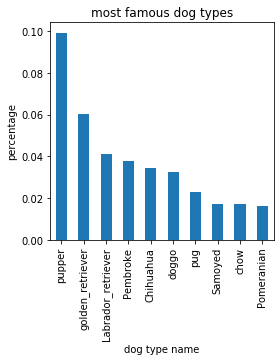

In [271]:
import matplotlib.pyplot as plt
%matplotlib inline

df.dog_types.value_counts(normalize=True)[:10].plot(kind="bar", title="most famous dog types" , figsize=(4,4))
plt.xlabel("dog type name")
plt.ylabel("percentage")


# what is the most favourit type  of dogs?
we can know this by sum likes and retweet then sorting by favorite_count then , retweet_count

In [272]:
df.groupby("dog_types").sum().iloc[:,2:].sort_values(["favorite_count" ,"retweet_count"] ,ascending=[False, False])

,retweet_count,favorite_count
dog_types,,
golden_retriever,494731.0,1669041.0
pupper,552749.0,1620417.0
doggo,468507.0,1279811.0
Labrador_retriever,360565.0,1105088.0
Pembroke,270001.0,954213.0
...,...,...
piggy_bank,92.0,344.0
trombone,115.0,323.0
hay,102.0,258.0


## What is the averge rating for African_hunting_dog ?

In [273]:
df.query('dog_types == "African_hunting_dog"').mean()["rating_numerator"] / 10

0.8

# create a summery for a pug dog type

In [274]:
df.query('dog_types == "pug"')["rating_numerator"].describe()

count    51.000000
mean     10.274510
std       1.960392
min       3.000000
25%       9.500000
50%      10.000000
75%      11.000000
max      13.000000
Name: rating_numerator, dtype: float64

Text(0, 0.5, 'rating')

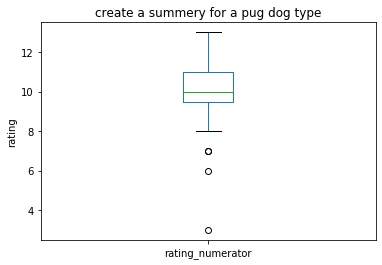

In [276]:
df.query('dog_types == "pug"')["rating_numerator"].plot(kind="box")
plt.title("create a summery for a pug dog type")
plt.ylabel("rating")